Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in Bank business. We will build a deep learning model to predict the churn and use precision, recall, f1-score to measure performance of our model


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

LOAD THE DATA

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


DROP UNNECCESSARY COLUMNS

In [7]:
df.drop(['RowNumber','CustomerId','Surname'], axis= 'columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


FEATURE ENGINEERING

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [11]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


ONE HOT ENCODING CATEGORICAL VALUES

In [12]:
df1 = pd.get_dummies(data=df, columns=['Geography', 'Gender'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [14]:
print_unique_col_values(df1)

In [18]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


SCALING THE DATASET

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
col_to_scale=['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

In [23]:
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [24]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [25]:
X = df1.drop('Exited',axis='columns')
y = df1.Exited

SPLITTING THE DATASET INTO TRAINING AND TEST SET

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [29]:
X_train.shape

(8000, 13)

In [30]:
X_test.shape

(2000, 13)

IMPORTING TENSORFLOW LIBRARIES

In [31]:
import tensorflow as tf
from tensorflow import keras

BUILD THE MODEL(ANN)

In [67]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(8000, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4867 - accuracy: 0.7961
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8052
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8161
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8224
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8276
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8369
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8443
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8510
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8549
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3535 - accura

In [68]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 629us/step - loss: 0.3948 - accuracy: 0.8460


[0.3947589695453644, 0.8460000157356262]

In [69]:
yp = model.predict(X_test)

In [70]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [71]:
y_pred[:10]

[0, 1, 1, 0, 1, 0, 0, 0, 0, 0]

In [72]:
y_test[:10]

937     0
9355    0
2293    1
192     0
8675    0
53      1
9596    0
265     0
984     0
9793    0
Name: Exited, dtype: int64

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1578
           1       0.73      0.43      0.54       422

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

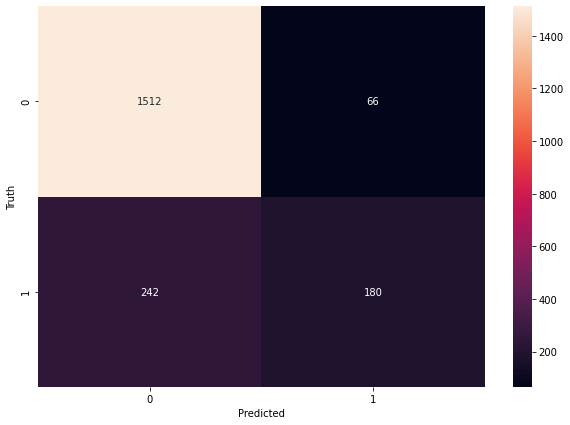

In [74]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')